## Description

#### A semiconductor fab is creating thin films with a chemical vapor deposition process.

#### They have completed Design of Experiment on 500 wafers by varying 3 process parameters:

   * Flowfactor: inversely proportional to precursor gas flow.</blockquote>
   * Spacing: distance between shower head that distributes the gas and wafer, in mm.</blockquote>
   * Deposition Time (in seconds).</blockquote>

<i> They chose 125 parameter combinations (recipes) and performed each of them on 4 different tools to account for tool variation.

<i> Film thickness values were measured (in angstrom) at 49 specific points on the wafer (sites). The specification is 1500Å.

<i> Coordinates of the sites are given in a separate file. Values are in micrometers, (0,0) is the center of the wafer.

### Task:
    
   * Build a machine learning model that predicts thickness at each site based on flowfactor, spacing, deposition time, and tool.
    
   *(Bonus) Build a generative model like VAE or GAN that would predict thickness profile for the whole wafer at once. For that you would need to convert site data to images using interpolation. Explain how you would assess the quality of interpolation.
    
   *(Bonus) Ensure that the model is capable of meaningfully extrapolating 1 standard deviation outside of the ranges of parameters present in the data.
    
   *(Bonus) Build a physics-based model (preferably using simulations) for this process that would include temperature.

#### Files ; site_coordinates.csv + test_assignment_sim.csv



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read and first look at the data, We have only integer or float values for the 4 first columns which will be our entries
DF = pd.read_csv ('test_assignment_sim.csv')
DF

,FLOWFACTOR,SPACING,DEP TIME,TOOL,SITE_0,SITE_1,SITE_2,SITE_3,SITE_4,SITE_5,...,SITE_39,SITE_40,SITE_41,SITE_42,SITE_43,SITE_44,SITE_45,SITE_46,SITE_47,SITE_48
0,0.916,0.344,69.289,1,1601.802686,1556.668725,1597.900238,1599.790647,1601.083756,1601.116007,...,1593.296029,1592.948758,1592.601486,1592.254216,1591.906946,1591.559675,1591.212405,1590.865134,1590.517862,1590.170593
1,0.916,0.344,69.289,2,1516.411140,1495.080373,1516.482818,1516.366352,1516.918855,1514.835611,...,1481.353478,1481.157584,1480.961690,1480.765797,1480.906328,1481.052943,1480.847698,1480.888354,1481.306459,1481.724561
2,0.916,0.344,69.289,3,1478.098433,1457.372553,1483.945610,1481.342541,1475.516841,1472.935249,...,1491.287428,1490.630367,1489.973305,1489.130805,1487.315196,1485.659583,1484.266940,1482.874286,1481.481632,1480.088988
3,0.916,0.344,69.289,4,1550.290615,1529.621080,1548.352252,1549.929704,1549.697136,1549.235110,...,1508.932376,1508.732902,1508.347436,1508.052235,1508.214925,1508.596579,1509.101775,1509.606975,1510.373006,1511.108004
4,0.957,0.348,70.253,1,1544.883218,1495.156181,1549.023309,1547.829132,1544.253208,1543.623198,...,1569.233533,1569.257056,1569.280579,1569.252501,1568.966865,1568.681228,1568.395593,1567.875699,1567.033903,1565.635512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.910,0.348,71.494,4,1579.678027,1554.131399,1582.133349,1581.752614,1578.538616,1576.167197,...,1591.884877,1593.910444,1595.920244,1597.930029,1599.939823,1601.064937,1602.044671,1602.274183,1602.330867,1602.387550
496,0.923,0.355,67.191,1,1506.290611,1444.277495,1505.734563,1505.713624,1506.867599,1507.444587,...,1485.450492,1484.933765,1484.315053,1483.920045,1483.788719,1483.811746,1484.540330,1485.410265,1486.280199,1487.150128
497,0.923,0.355,67.191,2,1433.885814,1401.300015,1441.602347,1437.744081,1430.923555,1428.490734,...,1390.019767,1389.793481,1389.567195,1389.669224,1389.903776,1390.894207,1390.904922,1391.148082,1392.018843,1392.553429
498,0.923,0.355,67.191,3,1385.057129,1355.168231,1387.311600,1384.319977,1384.609278,1382.555992,...,1358.969083,1357.977233,1356.985383,1355.993540,1355.001693,1354.009846,1353.018003,1352.026153,1351.034303,1350.042460


In [3]:
#Check if Data preprocessing is needed. We can see that there is no null values, columns o to 3 are float or integers. 
#Not data transformations is needed here
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FLOWFACTOR  500 non-null    float64
 1   SPACING     500 non-null    float64
 2   DEP TIME    500 non-null    float64
 3   TOOL        500 non-null    int64  
 4   SITE_0      500 non-null    float64
 5   SITE_1      500 non-null    float64
 6   SITE_2      500 non-null    float64
 7   SITE_3      500 non-null    float64
 8   SITE_4      500 non-null    float64
 9   SITE_5      500 non-null    float64
 10  SITE_6      500 non-null    float64
 11  SITE_7      500 non-null    float64
 12  SITE_8      500 non-null    float64
 13  SITE_9      500 non-null    float64
 14  SITE_10     500 non-null    float64
 15  SITE_11     500 non-null    float64
 16  SITE_12     500 non-null    float64
 17  SITE_13     500 non-null    float64
 18  SITE_14     500 non-null    float64
 19  SITE_15     500 non-null    f

Text(0.5, 1.0, 'Correlation Matrix')

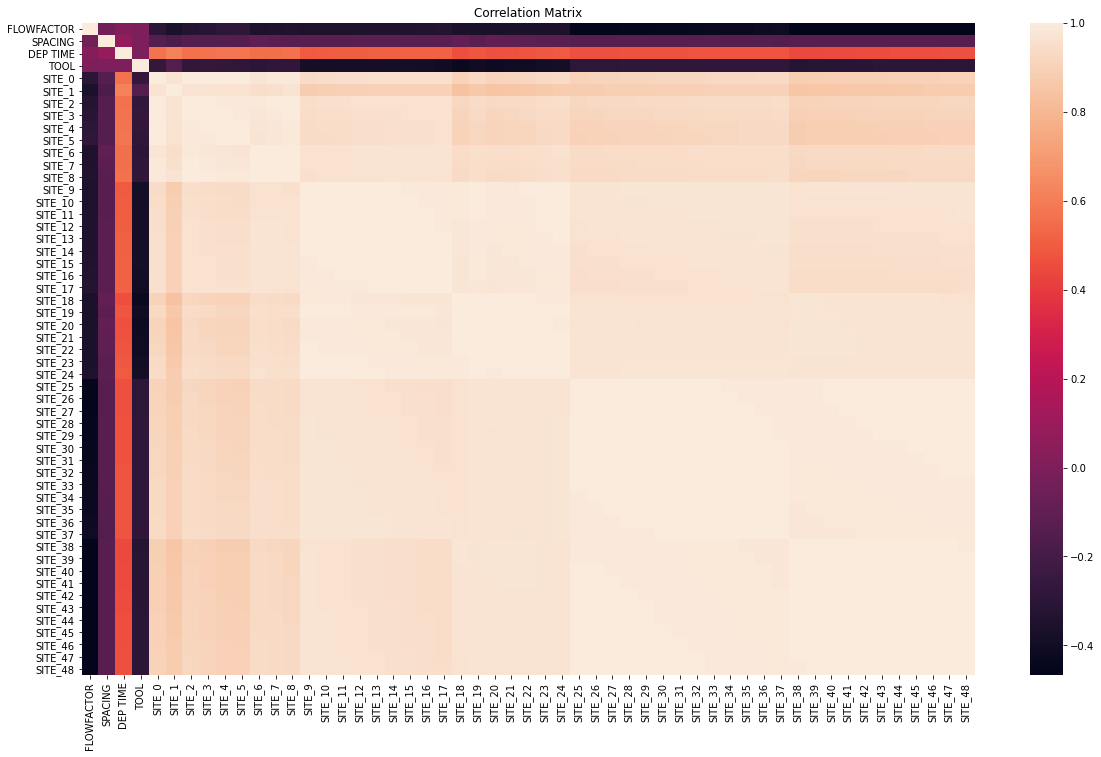

In [97]:
#This heatmap show us that FLOWFATCOR and TOOL are negatively correlated at roughly -0.4
#While SPACING and DEP TIME is positively correlated at 0.2 and 0.4
#An idea might be to make some new columns from those groups

#All labels coordinates are stongly correlated between 0.8 and 1
#We can also see some patern of correlation of 1, for instance from SITE_25 to SITE_37
#An idea might be to make group of SITE to symplify the model multi-labels


import seaborn as sns
plt.rcParams["figure.figsize"] = (20,12) # Custom figure size in inches
sns.heatmap(DF.corr())
plt.title('Correlation Matrix')

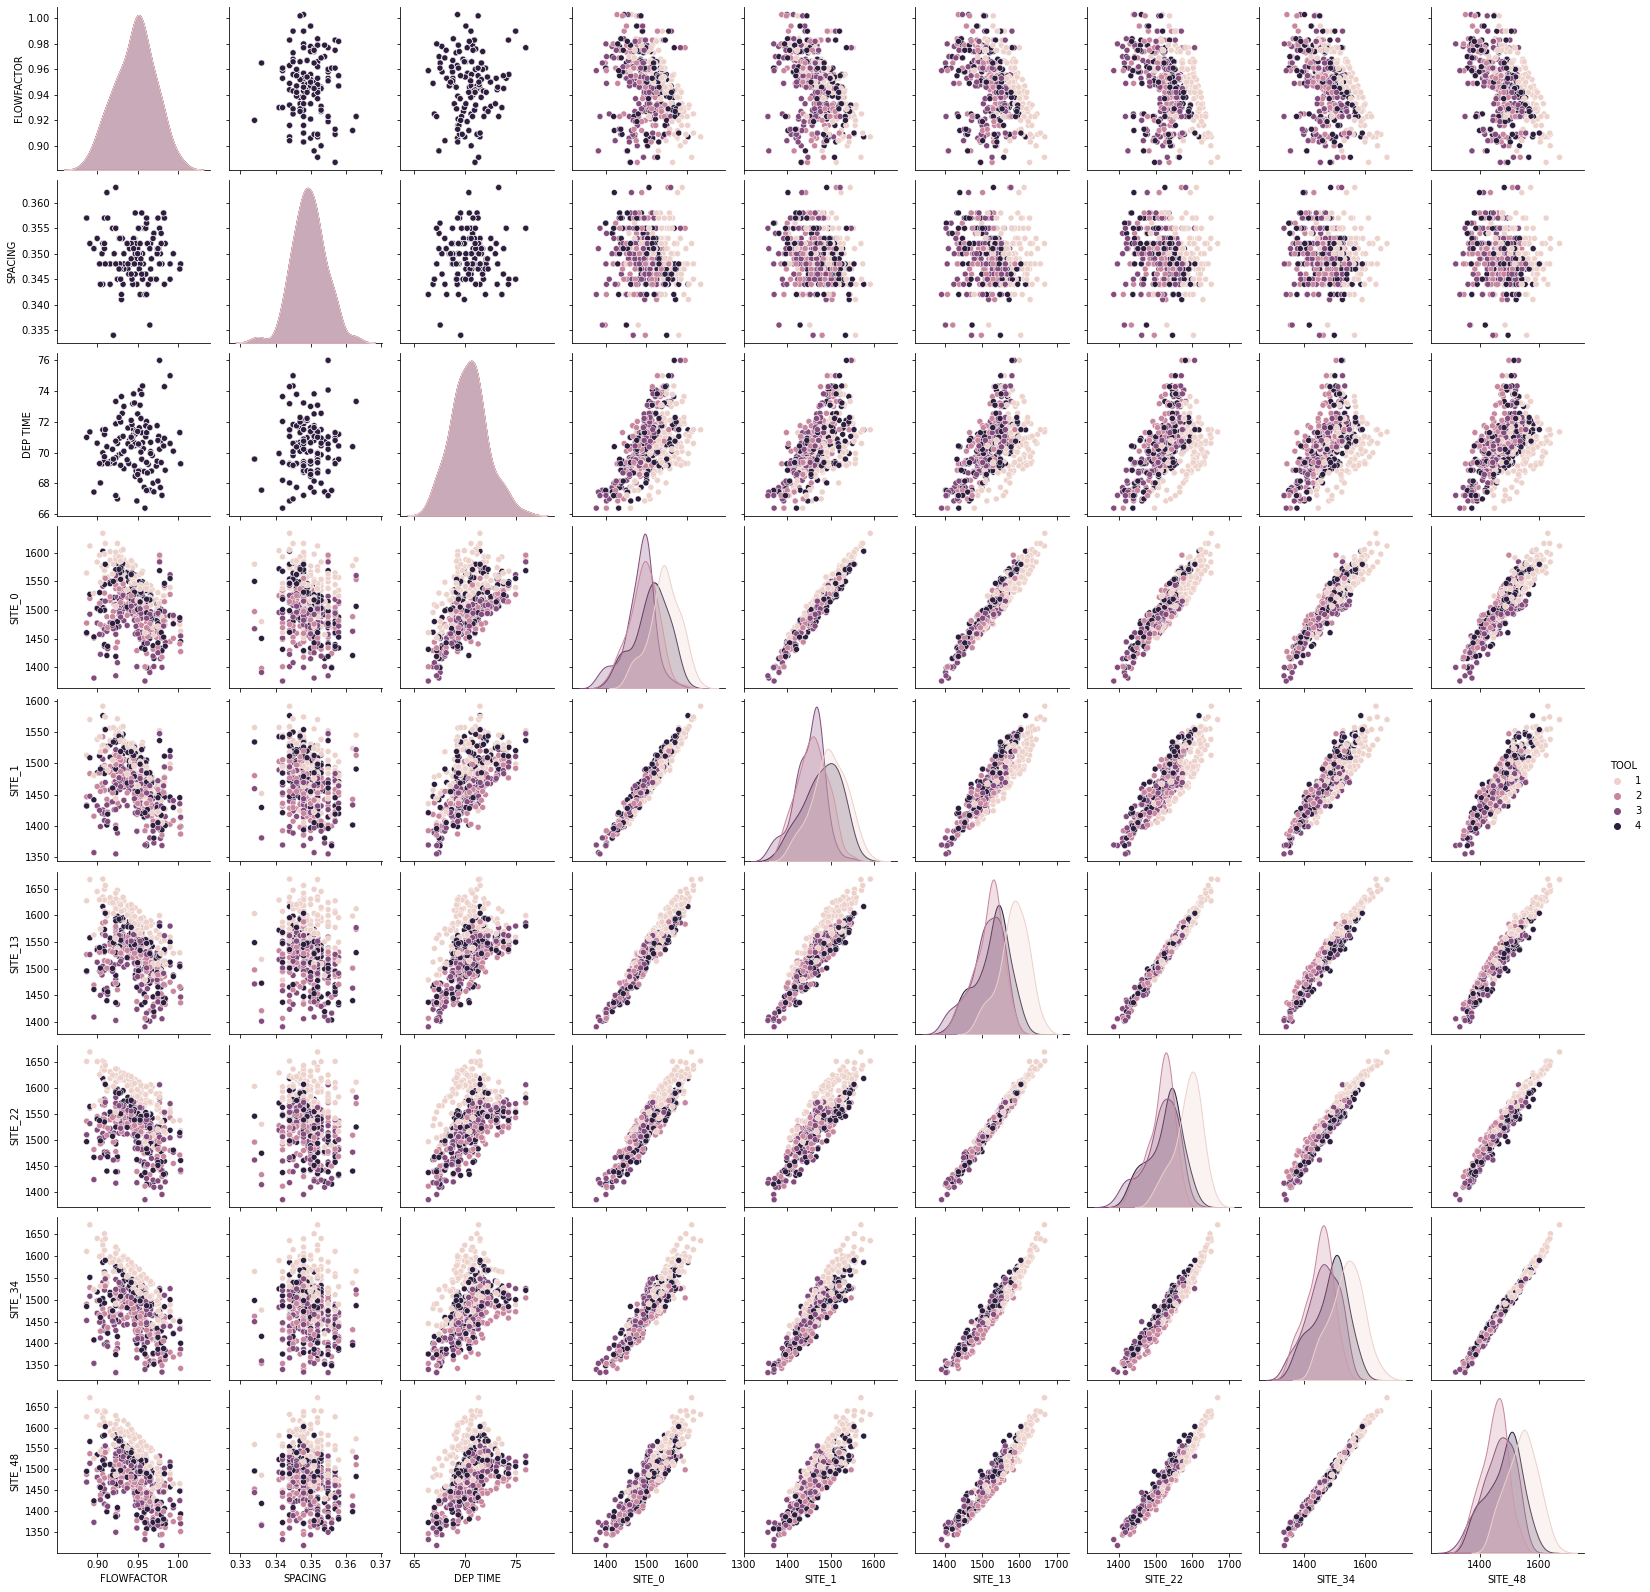

In [107]:
#Here we can visualise correlation between SITE
#DEP TIME has more correlation than the 3 other entries
# We can see the infuence of TOOL on the labels
#SPACING has a more spread distribution against SITE
sns.pairplot(DF.iloc[:,[0,1,2,3,4,5,17,26,-15,-1]], kind = 'scatter', hue = 'TOOL')

In [199]:
X = DF.iloc[:,:4]
y = DF.iloc[:, -49:]

### Creation of training and test set

In [200]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

### Feature Scaling 

In [201]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_Y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_Y.fit_transform(y_train)

### Model Training

#### 1 Linear

In [202]:
from sklearn.linear_model import LinearRegression

LRegressor  = LinearRegression()
LRegressor.fit(X_train_scaled, y_train_scaled)

LinearRegression()

#### 2 Polynomial

In [203]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures (degree = 4)
X_poly = poly_reg.fit_transform (X_train_scaled)
PRegressor  = LinearRegression()
PRegressor.fit(X_poly, y_train_scaled)

LinearRegression()

#### 3 Multioutput regressor with Random Forest

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

max_depth = 30
regr_multiOR = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multiOR.fit(X_train_scaled, y_train_scaled)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

#### 4 Random Forest 

In [205]:
regr_RF = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=0)
regr_RF.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(max_depth=30, random_state=0)

#### 5 Decision Tree

In [206]:
from sklearn.tree import DecisionTreeRegressor 
regr_DT = DecisionTreeRegressor(random_state = 0)

regr_DT.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=0)

#### 6 SVR

In [207]:
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
regr_SVR = MultiOutputRegressor(SVR)
regr_SVR.fit(X_train_scaled, y_train_scaled)

MultiOutputRegressor(estimator=SVR())

### Prediction

In [208]:
# Predict on new data
y_LR = sc_Y.inverse_transform(LRegressor.predict(sc_X.transform(X_test)))
y_PR = sc_Y.inverse_transform(PRegressor.predict(poly_reg.fit_transform(sc_X.transform(X_test))))
y_multiOR = sc_Y.inverse_transform(regr_multiOR.predict(sc_X.transform(X_test)))
y_RF = sc_Y.inverse_transform(regr_RF.predict(sc_X.transform(X_test)))
y_DT = sc_Y.inverse_transform(regr_DT.predict(sc_X.transform(X_test)))
y_SVR = sc_Y.inverse_transform(regr_SVR.predict(sc_X.transform(X_test)))

### Evaluation of Multi Output Regressor

In [252]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = {'Linear Regression' : y_LR, 'Polynomial Regression': y_PR, 'MultiOutput Regessor Random Forest': y_multiOR,
               'Random Forest': y_RF, 'Decision Tree': y_DT,'Support Vector Regression': y_SVR}
MSEs = []
RMSEs = []
MAEs = []
R2s=[]
R2adjs = []

for key in predictions :
    MSE = round(mean_squared_error(y_test,predictions[key]))
    RMSE = round(sqrt(mean_squared_error(y_test,predictions[key])),1)
    MAE = round(mean_absolute_error(y_test,predictions[key]),1)
    r2 = round(r2_score(y_test,predictions[key]),3)
    n =len(X_train)
    r2_adj =round (1- (1-r2)*(n-1)/(n-(13+1)),3)
    
    print('{} gives \nMSE {} / RMSE {} / MAE {} / Rscore {} / Radj {} \n'.format(key, MSE, RMSE, MAE, r2, r2_adj))
    

Linear Regression gives 
MSE 1571 / RMSE 39.6 / MAE 32.6 / Rscore 0.483 / Radj 0.466 

Polynomial Regression gives 
MSE 81 / RMSE 9.0 / MAE 6.4 / Rscore 0.973 / Radj 0.972 

MultiOutput Regessor Random Forest gives 
MSE 181 / RMSE 13.4 / MAE 10.2 / Rscore 0.939 / Radj 0.937 

Random Forest gives 
MSE 172 / RMSE 13.1 / MAE 10.0 / Rscore 0.94 / Radj 0.938 

Decision Tree gives 
MSE 306 / RMSE 17.5 / MAE 13.8 / Rscore 0.9 / Radj 0.897 

Support Vector Regression gives 
MSE 92 / RMSE 9.6 / MAE 6.5 / Rscore 0.967 / Radj 0.966 



## MODEL Rscore SELECTION SUMMARIZE

In [257]:
# We see that Polynomial regression and SVR has the best result on the unseen test set. They will be selected and refined

R2s=[]
for key in predictions :

    r2 = round(r2_score(y_test,predictions[key]),3)
    
    
    print('{} gives  \nRscore {}\n'.format(key, r2))
    

Linear Regression gives  
Rscore 0.483

Polynomial Regression gives  
Rscore 0.973

MultiOutput Regessor Random Forest gives  
Rscore 0.939

Random Forest gives  
Rscore 0.94

Decision Tree gives  
Rscore 0.9

Support Vector Regression gives  
Rscore 0.967



### Advanced SVR optimization with grid search

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
grid = GridSearchCV(

estimator= SVR(kernel='rbf'),

param_grid={

'C': [1.1, 5.4, 170, 1001],

'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 8, 0.2, 3, 2, 7],

'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_SVR = MultiOutputRegressor(grid)
grid_SVR.fit(X_train_scaled, y_train_scaled)


MultiOutputRegressor(estimator=GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                                            param_grid={'C': [1.1, 5.4, 170,
                                                              1001],
                                                        'epsilon': [0.0003,
                                                                    0.007,
                                                                    0.0109,
                                                                    0.019, 0.14,
                                                                    0.05, 8,
                                                                    0.2, 3, 2,
                                                                    7],
                                                        'gamma': [0.7001, 0.008,
                                                                  0.001, 3.1, 1,
                                                                  1.3, 5]},
  

In [140]:
y_grid_SVR = sc_Y.inverse_transform(grid_SVR.predict(sc_X.transform(X_test)))

In [142]:
#Here we see a small improvment with a grid search on SVR
r2_grid_SVR= r2_score(y_test,y_grid_SVR)
print("r2 grid search SVR: {:.3f} \n".format(r2_grid_SVR))

r2 grid search SVR: 0.970 



### Optimization of degree on the Polynomial Regression Model 

In [162]:
#Here we test some degree with a loop and we see that degree 4 give see best results

degrees = [2,3,4,5,6,7,8,10,20]
r2_PRs =[]
for deg in degrees:
    poly_reg = PolynomialFeatures (degree = deg)
    X_poly = poly_reg.fit_transform (X_train_scaled)
    PRegressor  = LinearRegression()
    PRegressor.fit(X_poly, y_train_scaled)
    y_PR = sc_Y.inverse_transform(PRegressor.predict(poly_reg.fit_transform(sc_X.transform(X_test))))
    r2_PR=r2_score(y_test,y_PR)
    r2_PRs.append
    
    print('degree {} give r2 {}'.format(deg, r2_PR))

    

degree 2 give r2 0.8580684087031268
degree 3 give r2 0.9430488631204378
degree 4 give r2 0.9726292387374075
degree 5 give r2 0.9442827714206621
degree 6 give r2 0.7648545481010397
degree 7 give r2 -0.16268911536926337
degree 8 give r2 -618.4341285346416
degree 10 give r2 -6931.230191211538
degree 20 give r2 -315594064625.14056


## Conclusion

#### Polynomial model degree 4 gives the best results with R2 score of 0.97 on the unseen test set